##Assignment

In [1]:
csv_data='''MovieID,Title,Genre,ReleaseDate,Rating,Revenue,Budget
1,Inception,Sci-Fi,2010-07-16,8.8,825532764,160000000
2,The Dark Knight,Action,2008-07-18,9.0,1004558444,185000000
3,Titanic,Romance,1997-12-19,7.8,2187463944,200000000
4,Interstellar,Sci-Fi,2014-11-07,8.6,677471339,165000000
5,Joker,Drama,2019-10-04,8.4,1074251311,55000000
6,The Notebook,Romance,2004-06-25,7.9,,29000000
7,Avengers: Endgame,Action,2019-04-26,8.4,2797800564,356000000'''
with open('movies.csv','w') as file:
  file.write(csv_data)

#PART 1: Pandas Operations

In [10]:
#1. Load movies.csv into a Pandas DataFrame.
import pandas as pd
df=pd.read_csv('movies.csv')
print(df)
#2. Convert ReleaseDate to datetime.
df['ReleaseDate']=pd.to_datetime(df['ReleaseDate'])
print(df)


   MovieID              Title    Genre ReleaseDate  Rating       Revenue  \
0        1          Inception   Sci-Fi  2010-07-16     8.8  8.255328e+08   
1        2    The Dark Knight   Action  2008-07-18     9.0  1.004558e+09   
2        3            Titanic  Romance  1997-12-19     7.8  2.187464e+09   
3        4       Interstellar   Sci-Fi  2014-11-07     8.6  6.774713e+08   
4        5              Joker    Drama  2019-10-04     8.4  1.074251e+09   
5        6       The Notebook  Romance  2004-06-25     7.9           NaN   
6        7  Avengers: Endgame   Action  2019-04-26     8.4  2.797801e+09   

      Budget  
0  160000000  
1  185000000  
2  200000000  
3  165000000  
4   55000000  
5   29000000  
6  356000000  
   MovieID              Title    Genre ReleaseDate  Rating       Revenue  \
0        1          Inception   Sci-Fi  2010-07-16     8.8  8.255328e+08   
1        2    The Dark Knight   Action  2008-07-18     9.0  1.004558e+09   
2        3            Titanic  Romance  199

In [9]:
#3. Calculate Profit = Revenue - Budget .
df['Profit']=df['Revenue']-df['Budget']
print(df)


   MovieID              Title    Genre ReleaseDate  Rating       Revenue  \
0        1          Inception   Sci-Fi  2010-07-16     8.8  8.255328e+08   
1        2    The Dark Knight   Action  2008-07-18     9.0  1.004558e+09   
2        3            Titanic  Romance  1997-12-19     7.8  2.187464e+09   
3        4       Interstellar   Sci-Fi  2014-11-07     8.6  6.774713e+08   
4        5              Joker    Drama  2019-10-04     8.4  1.074251e+09   
5        6       The Notebook  Romance  2004-06-25     7.9           NaN   
6        7  Avengers: Endgame   Action  2019-04-26     8.4  2.797801e+09   

      Budget        Profit  
0  160000000  6.655328e+08  
1  185000000  8.195584e+08  
2  200000000  1.987464e+09  
3  165000000  5.124713e+08  
4   55000000  1.019251e+09  
5   29000000           NaN  
6  356000000  2.441801e+09  


In [14]:
#4. Add a column "Era" :
'''Before 2000 → Classic
2000-2010 → Mid
After 2010 → Modern'''
def era(year):
  if year<2000:
    return 'Classic'
  elif year>=2000 and year<=2010:
    return 'Mid'
  else:
    return 'Modern'
df['Era']=df['ReleaseDate'].dt.year.apply(era)
print(df)


   MovieID              Title    Genre ReleaseDate  Rating       Revenue  \
0        1          Inception   Sci-Fi  2010-07-16     8.8  8.255328e+08   
1        2    The Dark Knight   Action  2008-07-18     9.0  1.004558e+09   
2        3            Titanic  Romance  1997-12-19     7.8  2.187464e+09   
3        4       Interstellar   Sci-Fi  2014-11-07     8.6  6.774713e+08   
4        5              Joker    Drama  2019-10-04     8.4  1.074251e+09   
5        6       The Notebook  Romance  2004-06-25     7.9           NaN   
6        7  Avengers: Endgame   Action  2019-04-26     8.4  2.797801e+09   

      Budget      Era  
0  160000000      Mid  
1  185000000      Mid  
2  200000000  Classic  
3  165000000   Modern  
4   55000000   Modern  
5   29000000      Mid  
6  356000000   Modern  


In [15]:
#5. Handle nulls in Revenue by filling with average revenue.
df['Revenue']=df['Revenue'].fillna(df['Revenue'].mean())
print(df)


   MovieID              Title    Genre ReleaseDate  Rating       Revenue  \
0        1          Inception   Sci-Fi  2010-07-16     8.8  8.255328e+08   
1        2    The Dark Knight   Action  2008-07-18     9.0  1.004558e+09   
2        3            Titanic  Romance  1997-12-19     7.8  2.187464e+09   
3        4       Interstellar   Sci-Fi  2014-11-07     8.6  6.774713e+08   
4        5              Joker    Drama  2019-10-04     8.4  1.074251e+09   
5        6       The Notebook  Romance  2004-06-25     7.9  1.427846e+09   
6        7  Avengers: Endgame   Action  2019-04-26     8.4  2.797801e+09   

      Budget      Era  
0  160000000      Mid  
1  185000000      Mid  
2  200000000  Classic  
3  165000000   Modern  
4   55000000   Modern  
5   29000000      Mid  
6  356000000   Modern  


In [17]:
#6. Sort by Rating descending.
df=df.sort_values(by='Rating',ascending=False)
print(df)


   MovieID              Title    Genre ReleaseDate  Rating       Revenue  \
1        2    The Dark Knight   Action  2008-07-18     9.0  1.004558e+09   
0        1          Inception   Sci-Fi  2010-07-16     8.8  8.255328e+08   
3        4       Interstellar   Sci-Fi  2014-11-07     8.6  6.774713e+08   
6        7  Avengers: Endgame   Action  2019-04-26     8.4  2.797801e+09   
4        5              Joker    Drama  2019-10-04     8.4  1.074251e+09   
5        6       The Notebook  Romance  2004-06-25     7.9  1.427846e+09   
2        3            Titanic  Romance  1997-12-19     7.8  2.187464e+09   

      Budget      Era  
1  185000000      Mid  
0  160000000      Mid  
3  165000000   Modern  
6  356000000   Modern  
4   55000000   Modern  
5   29000000      Mid  
2  200000000  Classic  


In [22]:
#7. Group by Genre → average Rating & total Revenue.
grouping_genere=df.groupby('Genre').agg({"Rating":"mean","Revenue":"sum"})
print(grouping_genere)


         Rating       Revenue
Genre                        
Action     8.70  3.802359e+09
Drama      8.40  1.074251e+09
Romance    7.85  3.615310e+09
Sci-Fi     8.70  1.503004e+09


In [ ]:
#8. Filter movies with Rating ≥ 8.5 and Profit >500M.
filtered_df = df[(df['Rating'] >= 8.5) & (df['Profit'] > 500000000)]
print(filtered_df)

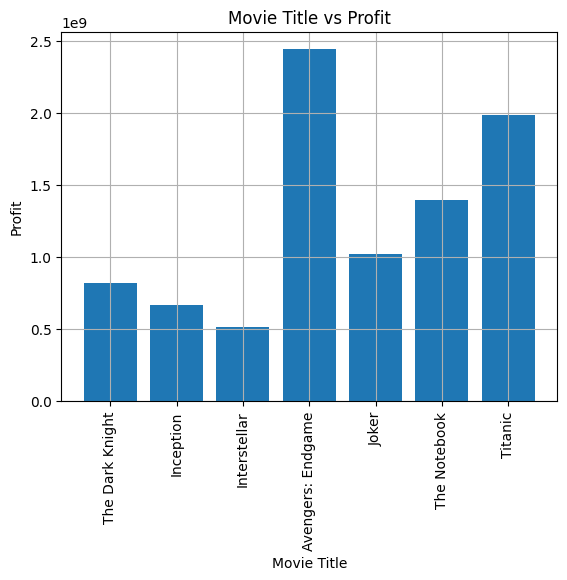

In [25]:
#9. Plot bar chart of Movie Title vs Profit.
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.bar(filtered_df['Title'],filtered_df['Profit'])
plt.xlabel('Movie Title')
plt.ylabel('Profit')
plt.title('Profit by Movie Title (Rating >= 8.5 and Profit > 500M)')
plt.xticks(rotation=45,ha='right')
plt.tight_layout()
plt.show()

#PART 2: PySpark Operations

In [26]:
#1. Read the same CSV using PySpark.
from pyspark.sql import SparkSession
spark=SparkSession.builder.appName("Assignment").getOrCreate()
df=spark.read.csv('movies.csv',header=True,inferSchema=True)
print(df.show())

+-------+-----------------+-------+-----------+------+----------+---------+
|MovieID|            Title|  Genre|ReleaseDate|Rating|   Revenue|   Budget|
+-------+-----------------+-------+-----------+------+----------+---------+
|      1|        Inception| Sci-Fi| 2010-07-16|   8.8| 825532764|160000000|
|      2|  The Dark Knight| Action| 2008-07-18|   9.0|1004558444|185000000|
|      3|          Titanic|Romance| 1997-12-19|   7.8|2187463944|200000000|
|      4|     Interstellar| Sci-Fi| 2014-11-07|   8.6| 677471339|165000000|
|      5|            Joker|  Drama| 2019-10-04|   8.4|1074251311| 55000000|
|      6|     The Notebook|Romance| 2004-06-25|   7.9|      NULL| 29000000|
|      7|Avengers: Endgame| Action| 2019-04-26|   8.4|2797800564|356000000|
+-------+-----------------+-------+-----------+------+----------+---------+

None


In [27]:

#2. Create Profit column ( Revenue - Budget ).
from pyspark.sql.functions import col
df=df.withColumn('Profit',col("Revenue")-col("Budget"))
print(df.show())


+-------+-----------------+-------+-----------+------+----------+---------+----------+
|MovieID|            Title|  Genre|ReleaseDate|Rating|   Revenue|   Budget|    Profit|
+-------+-----------------+-------+-----------+------+----------+---------+----------+
|      1|        Inception| Sci-Fi| 2010-07-16|   8.8| 825532764|160000000| 665532764|
|      2|  The Dark Knight| Action| 2008-07-18|   9.0|1004558444|185000000| 819558444|
|      3|          Titanic|Romance| 1997-12-19|   7.8|2187463944|200000000|1987463944|
|      4|     Interstellar| Sci-Fi| 2014-11-07|   8.6| 677471339|165000000| 512471339|
|      5|            Joker|  Drama| 2019-10-04|   8.4|1074251311| 55000000|1019251311|
|      6|     The Notebook|Romance| 2004-06-25|   7.9|      NULL| 29000000|      NULL|
|      7|Avengers: Endgame| Action| 2019-04-26|   8.4|2797800564|356000000|2441800564|
+-------+-----------------+-------+-----------+------+----------+---------+----------+

None


'=9 → Blockbuster\n8–9 → Hit\nbelow 8 → Average'

In [32]:
#3. Filter where Genre == 'Sci-Fi' and Profit > 50000000
df_filteres=df.filter((col('Genre')=='Sci-fi')&(col('Profit')>500000000))
print(df_filteres.show())


+-------+-----+-----+-----------+------+-------+------+------+
|MovieID|Title|Genre|ReleaseDate|Rating|Revenue|Budget|Profit|
+-------+-----+-----+-----------+------+-------+------+------+
+-------+-----+-----+-----------+------+-------+------+------+

None


'=9 → Blockbuster\n8–9 → Hit\nbelow 8 → Average'

In [33]:
#4. Group by Genre → avg(Rating) , sum(Profit)
df_group=df.groupBy('Genre').agg({'Rating':'avg','Profit':'sum'})
print(df_group.show())


+-------+-----------+-----------+
|  Genre|avg(Rating)|sum(Profit)|
+-------+-----------+-----------+
|Romance|       7.85| 1987463944|
|  Drama|        8.4| 1019251311|
| Action|        8.7| 3261359008|
| Sci-Fi|        8.7| 1178004103|
+-------+-----------+-----------+

None


'=9 → Blockbuster\n8–9 → Hit\nbelow 8 → Average'

In [40]:
#5. Use when().otherwise() to classify Rating as:
'''=9 → Blockbuster
8–9 → Hit
below 8 → Average'''
from pyspark.sql.functions import when
from pyspark.sql.functions import col
df=df.withColumn("Rating level",when(col("Rating")==9,"BlockBuster").when((col("Rating")>=8)&(col("Rating")<=9),"Hit").otherwise("Average"))
print(df.show())



+-------+-----------------+-------+-----------+------+----------+---------+----------+------------+
|MovieID|            Title|  Genre|ReleaseDate|Rating|   Revenue|   Budget|    Profit|Rating level|
+-------+-----------------+-------+-----------+------+----------+---------+----------+------------+
|      1|        Inception| Sci-Fi| 2010-07-16|   8.8| 825532764|160000000| 665532764|         Hit|
|      2|  The Dark Knight| Action| 2008-07-18|   9.0|1004558444|185000000| 819558444| BlockBuster|
|      3|          Titanic|Romance| 1997-12-19|   7.8|2187463944|200000000|1987463944|     Average|
|      4|     Interstellar| Sci-Fi| 2014-11-07|   8.6| 677471339|165000000| 512471339|         Hit|
|      5|            Joker|  Drama| 2019-10-04|   8.4|1074251311| 55000000|1019251311|         Hit|
|      6|     The Notebook|Romance| 2004-06-25|   7.9|      NULL| 29000000|      NULL|     Average|
|      7|Avengers: Endgame| Action| 2019-04-26|   8.4|2797800564|356000000|2441800564|         Hit|


In [ ]:

#6. Drop the Budget column.
df=df.drop('Budget')
print(df.show())


In [41]:
#7. Fill null revenue with average (use na.fill() or na.replace() ).
from pyspark.sql.functions import col, avg
avg_revenue = df.select(avg(col("Revenue"))).first()[0]
df = df.na.fill({"Revenue": avg_revenue})
df.show()



+-------+-----------------+-------+-----------+------+----------+---------+----------+------------+
|MovieID|            Title|  Genre|ReleaseDate|Rating|   Revenue|   Budget|    Profit|Rating level|
+-------+-----------------+-------+-----------+------+----------+---------+----------+------------+
|      1|        Inception| Sci-Fi| 2010-07-16|   8.8| 825532764|160000000| 665532764|         Hit|
|      2|  The Dark Knight| Action| 2008-07-18|   9.0|1004558444|185000000| 819558444| BlockBuster|
|      3|          Titanic|Romance| 1997-12-19|   7.8|2187463944|200000000|1987463944|     Average|
|      4|     Interstellar| Sci-Fi| 2014-11-07|   8.6| 677471339|165000000| 512471339|         Hit|
|      5|            Joker|  Drama| 2019-10-04|   8.4|1074251311| 55000000|1019251311|         Hit|
|      6|     The Notebook|Romance| 2004-06-25|   7.9|1427846394| 29000000|      NULL|     Average|
|      7|Avengers: Endgame| Action| 2019-04-26|   8.4|2797800564|356000000|2441800564|         Hit|


In [44]:
#8. Convert ReleaseDate to date type, extract year and month .
from pyspark.sql.functions import to_date, year, month
df=df.withColumn("ReleaseDate", to_date(col("ReleaseDate")))
df =df.withColumn("Year", year(col("ReleaseDate")))
df=df.withColumn("Month", month(col("ReleaseDate")))
df.show()

+-------+-----------------+-------+-----------+------+----------+---------+----------+------------+----+-----+
|MovieID|            Title|  Genre|ReleaseDate|Rating|   Revenue|   Budget|    Profit|Rating level|Year|Month|
+-------+-----------------+-------+-----------+------+----------+---------+----------+------------+----+-----+
|      1|        Inception| Sci-Fi| 2010-07-16|   8.8| 825532764|160000000| 665532764|         Hit|2010|    7|
|      2|  The Dark Knight| Action| 2008-07-18|   9.0|1004558444|185000000| 819558444| BlockBuster|2008|    7|
|      3|          Titanic|Romance| 1997-12-19|   7.8|2187463944|200000000|1987463944|     Average|1997|   12|
|      4|     Interstellar| Sci-Fi| 2014-11-07|   8.6| 677471339|165000000| 512471339|         Hit|2014|   11|
|      5|            Joker|  Drama| 2019-10-04|   8.4|1074251311| 55000000|1019251311|         Hit|2019|   10|
|      6|     The Notebook|Romance| 2004-06-25|   7.9|1427846394| 29000000|      NULL|     Average|2004|    6|
|

In [46]:
#9. Use a window function to rank movies within each genre by profit.
from pyspark.sql.window import Window
from pyspark.sql.functions import row_number
window_spec=Window.partitionBy("Genre").orderBy(col("Profit").desc())
df=df.withColumn("Rank",row_number().over(window_spec))
df.show()

+-------+-----------------+-------+-----------+------+----------+---------+----------+------------+----+-----+----+
|MovieID|            Title|  Genre|ReleaseDate|Rating|   Revenue|   Budget|    Profit|Rating level|Year|Month|Rank|
+-------+-----------------+-------+-----------+------+----------+---------+----------+------------+----+-----+----+
|      7|Avengers: Endgame| Action| 2019-04-26|   8.4|2797800564|356000000|2441800564|         Hit|2019|    4|   1|
|      2|  The Dark Knight| Action| 2008-07-18|   9.0|1004558444|185000000| 819558444| BlockBuster|2008|    7|   2|
|      5|            Joker|  Drama| 2019-10-04|   8.4|1074251311| 55000000|1019251311|         Hit|2019|   10|   1|
|      3|          Titanic|Romance| 1997-12-19|   7.8|2187463944|200000000|1987463944|     Average|1997|   12|   1|
|      6|     The Notebook|Romance| 2004-06-25|   7.9|1427846394| 29000000|      NULL|     Average|2004|    6|   2|
|      1|        Inception| Sci-Fi| 2010-07-16|   8.8| 825532764|1600000

#PART 3: JSON + Union Example

In [58]:
import json

data = [
    {
        "MovieID": 8,
        "Title": "Barbie",
        "Genre": "Drama",
        "Rating": 7.5,
        "Revenue": 1456000000,
        "Budget": 145000000
    },
    {
        "MovieID": 9,
        "Title": "Oppenheimer",
        "Genre": "Drama",
        "Rating": 8.6,
        "Revenue": 950000000,
        "Budget": 100000000
    }
]

with open("movies_bonus.json", "w") as f:
    json.dump(data, f, indent=4)


In [64]:
#1. Read this JSON using PySpark.
from pyspark.sql import SparkSession
import json
spark = SparkSession.builder.appName("jsonOperations").getOrCreate()
with open("movies_bonus.json", "r") as f:
    data = json.load(f)
bonus_df = spark.createDataFrame(data)
bonus_df.show()

+---------+-----+-------+------+----------+-----------+
|   Budget|Genre|MovieID|Rating|   Revenue|      Title|
+---------+-----+-------+------+----------+-----------+
|145000000|Drama|      8|   7.5|1456000000|     Barbie|
|100000000|Drama|      9|   8.6| 950000000|Oppenheimer|
+---------+-----+-------+------+----------+-----------+



In [69]:
#2. Union it with your original movies DataFrame.
from pyspark.sql.functions import col, lit
original_columns=df.columns
for col_name in original_columns:
    if col_name not in bonus_df.columns:
        bonus_df = bonus_df.withColumn(col_name, lit(None))
bonus_df=bonus_df.select(original_columns)
combined_df=df.unionByName(bonus_df)
combined_df.show()

#3. Show top 5 highest grossing movies.
df_sorted=combined_df.orderBy(col("Revenue").desc())
df_sorted.show(5)

#4. Save final merged DataFrame as CSV.
combined_df.write.csv("combined_movies.csv", header=True, mode="overwrite")


+-------+-----------------+-------+-----------+------+----------+---------+----------+------------+----+-----+----+
|MovieID|            Title|  Genre|ReleaseDate|Rating|   Revenue|   Budget|    Profit|Rating level|Year|Month|Rank|
+-------+-----------------+-------+-----------+------+----------+---------+----------+------------+----+-----+----+
|      7|Avengers: Endgame| Action| 2019-04-26|   8.4|2797800564|356000000|2441800564|         Hit|2019|    4|   1|
|      2|  The Dark Knight| Action| 2008-07-18|   9.0|1004558444|185000000| 819558444| BlockBuster|2008|    7|   2|
|      5|            Joker|  Drama| 2019-10-04|   8.4|1074251311| 55000000|1019251311|         Hit|2019|   10|   1|
|      3|          Titanic|Romance| 1997-12-19|   7.8|2187463944|200000000|1987463944|     Average|1997|   12|   1|
|      6|     The Notebook|Romance| 2004-06-25|   7.9|1427846394| 29000000|      NULL|     Average|2004|    6|   2|
|      1|        Inception| Sci-Fi| 2010-07-16|   8.8| 825532764|1600000

#Bonus:

In [71]:
#Create a column ReturnOnInvestment = Profit / Budget
from pyspark.sql.functions import col
combined_df=combined_df.withColumn("ReturnOnInvestment", col("Profit") / col("Budget"))
combined_df.show()

+-------+-----------------+-------+-----------+------+----------+---------+----------+------------+----+-----+----+------------------+
|MovieID|            Title|  Genre|ReleaseDate|Rating|   Revenue|   Budget|    Profit|Rating level|Year|Month|Rank|ReturnOnInvestment|
+-------+-----------------+-------+-----------+------+----------+---------+----------+------------+----+-----+----+------------------+
|      7|Avengers: Endgame| Action| 2019-04-26|   8.4|2797800564|356000000|2441800564|         Hit|2019|    4|   1| 6.858990348314607|
|      2|  The Dark Knight| Action| 2008-07-18|   9.0|1004558444|185000000| 819558444| BlockBuster|2008|    7|   2| 4.430045643243243|
|      5|            Joker|  Drama| 2019-10-04|   8.4|1074251311| 55000000|1019251311|         Hit|2019|   10|   1| 18.53184201818182|
|      3|          Titanic|Romance| 1997-12-19|   7.8|2187463944|200000000|1987463944|     Average|1997|   12|   1|        9.93731972|
|      6|     The Notebook|Romance| 2004-06-25|   7.9|1

In [72]:
#Show top ROI movies (minimum budget50M)
filtered_df=combined_df.filter(col("Budget")>=50000000)
filtered_df.show()


+-------+-----------------+-------+-----------+------+----------+---------+----------+------------+----+-----+----+------------------+
|MovieID|            Title|  Genre|ReleaseDate|Rating|   Revenue|   Budget|    Profit|Rating level|Year|Month|Rank|ReturnOnInvestment|
+-------+-----------------+-------+-----------+------+----------+---------+----------+------------+----+-----+----+------------------+
|      7|Avengers: Endgame| Action| 2019-04-26|   8.4|2797800564|356000000|2441800564|         Hit|2019|    4|   1| 6.858990348314607|
|      2|  The Dark Knight| Action| 2008-07-18|   9.0|1004558444|185000000| 819558444| BlockBuster|2008|    7|   2| 4.430045643243243|
|      5|            Joker|  Drama| 2019-10-04|   8.4|1074251311| 55000000|1019251311|         Hit|2019|   10|   1| 18.53184201818182|
|      3|          Titanic|Romance| 1997-12-19|   7.8|2187463944|200000000|1987463944|     Average|1997|   12|   1|        9.93731972|
|      1|        Inception| Sci-Fi| 2010-07-16|   8.8| 

In [79]:
#Calculate Genre-wise ROI
from pyspark.sql.functions import col, avg
genre_roi_df=combined_df.groupBy("Genre").agg(avg("ReturnOnInvestment").alias("Average"))
genre_roi_df.show()

+-------+------------------+
|  Genre|           Average|
+-------+------------------+
|Romance|        9.93731972|
|  Drama| 18.53184201818182|
| Action| 5.644517995778925|
| Sci-Fi|3.6327333390151515|
+-------+------------------+



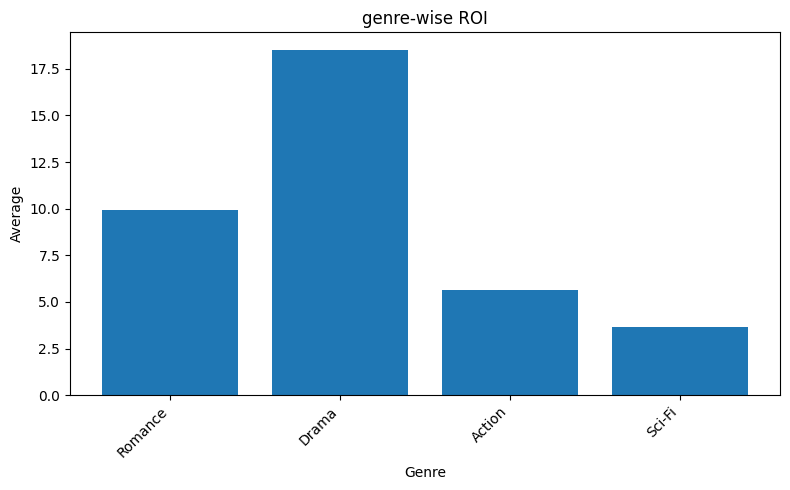

In [80]:
# Plot genre-wise ROI as a bar chart using Pandas
import matplotlib.pyplot as plt
genre_roi_pandas_df=genre_roi_df.toPandas()
plt.figure(figsize=(8,5))
plt.bar(genre_roi_pandas_df['Genre'], genre_roi_pandas_df['Average'])
plt.xlabel('Genre')
plt.ylabel('Average')
plt.title('genre-wise ROI')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()